### Stick & ball models
In this notebook you will learn how to generate a simple compartment model using the 
`NEURON` simulator.

While this is not the primary objective of the project it's a useful exercise to get to know `NEURON`.

If you haven't already, please make sure `NEURON` and `matplotlib` are installed:

```bash 
pip3 install neuron matplotlib -U
```

Again the first thing is to import the NEURON module

In [1]:
import neuron

from neuron import h
from neuron.units import ms, mV, µm

# Load the extra functionality
h.load_file("stdrun.hoc")

neuron.__version__

'8.2.3'

In the first notebook we used a single `Section`. More complex neurons can be constructed by simply combining multiple linear sections.

Let's generate a simple ball and stick model:

In [2]:
# Define a section for the soma (ball)
soma = h.Section(name="soma")

# Define a section for the dendrite (stick)
dend = h.Section(name="dend")

# And connect the dendrites to the soma 
dend.connect(soma)

# Adjust morphological parameters 
soma.L = soma.diam = 12.6157 * µm
dend.L = 200 * µm
dend.diam = 1 * µm

Next we need to set biophysical properties:

In [3]:
soma.Ra = 100  # Axial resistance in Ohm * cm
soma.cm = 1  # Membrane capacitance in micro Farads / cm^2

# Add Hodgkin-Huxley (HH) mechanism
soma.insert("hh") 

# Adjust HH properties
for seg in soma:
    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
    seg.hh.gl = 0.0003  # Leak conductance in S/cm2
    seg.hh.el = -54.3 * mV  # Reversal potential

# Insert passive current mechanism in the dendrite                       
dend.insert("pas") 

for seg in dend:
    seg.pas.g = 0.001  # Passive conductance in S/cm2       
    seg.pas.e = -65 * mV  # Leak reversal potential         

Note how we're iterating over `dend` and `soma` to set the properties for mechanisms? That's because each `Section` consists of several "Segments", each of which has its own set of properties.

What's missing is:
1. A stimulus
2. Recording of time and voltage

In [4]:
# Setup a current clamp stimulus
stim = h.IClamp(dend(1))
stim.delay = 5
stim.dur = 1
stim.amp = 0.1

# Setup recording of voltage in soma 
soma_v = h.Vector().record(soma(0.5)._ref_v)

# Setup recording of time 
t = h.Vector().record(h._ref_t)

Great! Now we can run the simulation

In [5]:
h.finitialize(-65 * mV)
h.continuerun(25 * ms)

0.0

And plot the results:

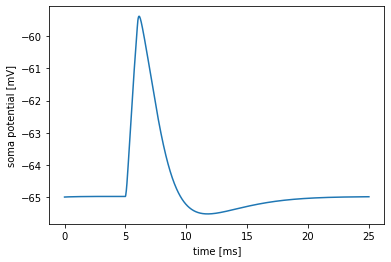

In [6]:
import matplotlib.pyplot as plt

# Plot voltage over time
_ = plt.plot(t.as_numpy(), soma_v.as_numpy())

# Some cosmetics
ax = plt.gca()
ax.set_xlabel("time [ms]")
ax.set_ylabel("soma potential [mV]")

plt.show()

Subthreshold - i.e. no spike in soma. 

Let's run an experiment where we increase the current injection:

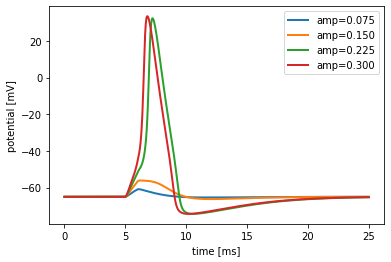

In [12]:
# Generate a figure
fig, ax = plt.subplots()
ax.set_xlabel("time [ms]") 
ax.set_ylabel("potential [mV]")

# Define a set up amplitudes to test
amps = [0.075 * i for i in range(1, 5)]

# Iterate over the different amplitudes
for amp in amps:
    # Set the amplitude for this round
    stim.amp = amp

    # Reset and run the simulation
    h.finitialize(-65 * mV)
    h.continuerun(25 * ms)

    # Add results to the plot
    ax.plot(t, list(soma_v), lw=2, label=f"amp={amp:.3f}")

ax.legend()

Now you have _15min_ to play around with the above. Please download this notebook
and run on your machine or collaboratory. A couple tasks:

1. Add a second recording at the dendrite and plot it
2. Set the stimulus to `amp=0.3`, add a second stimulus with `amp=0.225`, `delay=10` and `dur=1` and run the simulation.
3. Vary `delay` (instead of `amp`) and co-visualize the results